## Maske Oluşturma

In [ ]:
import os
import numpy as np
from PIL import Image

def convert_red_overlays_to_masks(base_path, data_type):
    """
    OVERLAY klasöründeki kırmızı renkli lezyonları içeren PNG'leri okur,
    bunları hassas bir şekilde siyah-beyaz maskelere dönüştürür ve 'MASKS'
    klasörüne kaydeder.
    """
    overlay_folder = os.path.join(base_path, data_type, 'OVERLAY')
    mask_folder = os.path.join(base_path, data_type, 'MASKS')

    if not os.path.exists(mask_folder):
        os.makedirs(mask_folder)
        print(f"'{mask_folder}' klasörü oluşturuldu.")

    if not os.path.exists(overlay_folder):
        print(f"HATA: '{overlay_folder}' klasörü bulunamadı.")
        return
        
    overlay_files = [f for f in os.listdir(overlay_folder) if f.endswith('.png')]
    if not overlay_files:
        print(f"'{overlay_folder}' içinde işlenecek .png dosyası bulunamadı.")
        return

    print(f"'{overlay_folder}' klasöründeki {len(overlay_files)} kırmızı overlay dosyası işleniyor...")

    for filename in overlay_files:
        overlay_path = os.path.join(overlay_folder, filename)
        
        try:
            overlay_img = Image.open(overlay_path).convert('RGB')
            data = np.array(overlay_img)
            R = data[:, :, 0]
            G = data[:, :, 1]
            B = data[:, :, 2]
            
            # Bir pikselin lezyon olması için:
            # Kırmızı kanalı belirli bir eşikten (gürültüyü önlemek için) yüksek olmalı. ve kırmızı kanal, hem yeşil hem de mavi kanaldan daha baskın olmalı.
            red_threshold = 50
            is_lesion = (R > red_threshold) & (R > G) & (R > B)
            
            # Boş (siyah) bir maske oluştur
            mask = np.zeros((data.shape[0], data.shape[1]), dtype=np.uint8)
            
            # Sadece lezyon olarak tespit edilen pikselleri beyaza (255) boya
            mask[is_lesion] = 255
            
            # NumPy dizisini tekrar PIL Görüntüsüne çevir
            mask_image = Image.fromarray(mask)
            mask_image = mask_image.convert("L")
            # Yeni maske dosyasını MASKS klasörüne kaydet
            output_path = os.path.join(mask_folder, filename)
            mask_image.save(output_path)

        except Exception as e:
            print(f"HATA: '{filename}' işlenirken bir sorun oluştu: {e}")
            
    print(f"\nİşlem tamamlandı. Hassas maskeler '{mask_folder}' klasörüne kaydedildi.")

ANA_VERI_YOLU = "Brain_Stroke_CT_Dataset" 

print("--- Bleeding için Kırmızı Lezyon Maskeleri oluşturuluyor ---")
convert_red_overlays_to_masks(ANA_VERI_YOLU, 'Bleeding')

print("\n--- Ischemia için Kırmızı Lezyon Maskeleri oluşturuluyor ---")
convert_red_overlays_to_masks(ANA_VERI_YOLU, 'Ischemia')

--- Bleeding için Kırmızı Lezyon Maskeleri oluşturuluyor ---
'Brain_Stroke_CT_Dataset\Bleeding\OVERLAY' klasöründeki 1093 kırmızı overlay dosyası işleniyor...

İşlem tamamlandı. Hassas maskeler 'Brain_Stroke_CT_Dataset\Bleeding\MASKS' klasörüne kaydedildi.

--- Ischemia için Kırmızı Lezyon Maskeleri oluşturuluyor ---
'Brain_Stroke_CT_Dataset\Ischemia\OVERLAY' klasöründeki 1130 kırmızı overlay dosyası işleniyor...

İşlem tamamlandı. Hassas maskeler 'Brain_Stroke_CT_Dataset\Ischemia\MASKS' klasörüne kaydedildi.


In [ ]:
import os
import numpy as np
from PIL import Image

def overwrite_masks_with_color(base_path, data_type):
    """
    MASKS klasöründeki siyah-beyaz .png maskelerini okur.
    'Bleeding' için yeşile, 'Ischemia' için maviye boyar ve
    sonuçları doğrudan orijinal dosyaların üzerine kaydeder.
    """
    mask_folder = os.path.join(base_path, data_type, 'MASKS')

    if not os.path.exists(mask_folder):
        print(f"HATA: Klasör '{mask_folder}' bulunamadı.")
        return
        
    mask_files = [f for f in os.listdir(mask_folder) if f.endswith('.png')]
    if not mask_files:
        print(f"'{mask_folder}' içinde işlenecek .png dosyası bulunamadı.")
        return
    target_color_name = ""
    target_color_rgb = (0, 0, 0) 

    if data_type == 'Bleeding':
        target_color_name = "yeşil"
        target_color_rgb = (0, 255, 0) # Yeşil
    elif data_type == 'Ischemia':
        target_color_name = "mavi"
        target_color_rgb = (0, 0, 255) # Mavi
    else:
        return

    print(f"'{mask_folder}' klasöründeki {len(mask_files)} maske {target_color_name} renge dönüştürülüp üzerlerine yazılacak...")

    for filename in mask_files:
        mask_path = os.path.join(mask_folder, filename)
        
        try:
            bw_mask_img = Image.open(mask_path).convert('L')
            bw_mask_array = np.array(bw_mask_img)
            color_mask_array = np.zeros((bw_mask_array.shape[0], bw_mask_array.shape[1], 3), dtype=np.uint8)
            white_pixels = bw_mask_array > 0
            color_mask_array[white_pixels] = target_color_rgb
            color_mask_image = Image.fromarray(color_mask_array)
            color_mask_image.save(mask_path)

        except Exception as e:
            print(f"HATA: '{filename}' işlenirken bir sorun oluştu: {e}")
            
    print(f"\nİşlem tamamlandı. '{mask_folder}' klasöründeki maskeler renklendirildi.")



ANA_VERI_YOLU = "Brain_Stroke_CT_Dataset" 

print("--- Bleeding maskeleri yeşile boyanıyor (üzerine yazma) ---")
overwrite_masks_with_color(ANA_VERI_YOLU, 'Bleeding')

print("\n--- Ischemia maskeleri maviye boyanıyor (üzerine yazma) ---")
overwrite_masks_with_color(ANA_VERI_YOLU, 'Ischemia')

--- Bleeding maskeleri yeşile boyanıyor (üzerine yazma) ---
'Brain_Stroke_CT_Dataset\Bleeding\MASKS' klasöründeki 1093 maske yeşil renge dönüştürülüp üzerlerine yazılacak...

İşlem tamamlandı. 'Brain_Stroke_CT_Dataset\Bleeding\MASKS' klasöründeki maskeler renklendirildi.

--- Ischemia maskeleri maviye boyanıyor (üzerine yazma) ---
'Brain_Stroke_CT_Dataset\Ischemia\MASKS' klasöründeki 1130 maske mavi renge dönüştürülüp üzerlerine yazılacak...

İşlem tamamlandı. 'Brain_Stroke_CT_Dataset\Ischemia\MASKS' klasöründeki maskeler renklendirildi.


## Segmentation

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import segmentation_models_pytorch as smp
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from glob import glob
from sklearn.model_selection import train_test_split
import albumentations as A
from albumentations.pytorch import ToTensorV2
from tqdm import tqdm
import warnings
import glob
warnings.filterwarnings('ignore')

print(f"PyTorch version: {torch.__version__}")
print(f"CUDA Available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"CUDA Device: {torch.cuda.get_device_name(0)}")

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

PyTorch version: 2.5.1
CUDA Available: True
CUDA Device: NVIDIA GeForce RTX 2070
Using device: cuda


In [ ]:
DATA_DIR = r"C:\Users\omer_\Documents\GitHub\ytustats\standard_u-net\Brain_Stroke_CT_Dataset"

# Bleeding ve Ischemia için görüntü ve maske yolları
image_files = []
mask_files = []

LESION_CLASSES = ["Bleeding", "Ischemia"]

print("Segmentasyon için görüntü ve maskeler eşleştiriliyor...")
for class_name in LESION_CLASSES:
    image_dir = os.path.join(DATA_DIR, class_name, 'PNG')      
    mask_dir = os.path.join(DATA_DIR, class_name, 'MASKS')
    
    if not os.path.isdir(image_dir):
        print(f"UYARI: Görüntü klasörü bulunamadı: {image_dir}")
        continue
    if not os.path.isdir(mask_dir):
        print(f"UYARI: Maske klasörü bulunamadı: {mask_dir}")
        continue
        
    # Her bir görüntü dosyası için maske karşılığını bul
    for image_name in os.listdir(image_dir):
        if image_name.endswith('.png'):
            image_path = os.path.join(image_dir, image_name)
            mask_path = os.path.join(mask_dir, image_name)
            
            # Eğer görüntünün bir maske karşılığı varsa listeye ekle
            if os.path.exists(mask_path):
                image_files.append(image_path)
                mask_files.append(mask_path)

print(f"Toplam {len(image_files)} adet eşleşmiş görüntü ve maske bulundu.")

# Veriyi Eğitim (%80) ve Doğrulama (%20) olarak ayıralım, test setini daha sonra ayırabiliriz veya doğrulama setini kullanabiliriz.
X_train, X_val, y_train, y_val = train_test_split(
    image_files, mask_files, test_size=0.2, random_state=42
)

print(f"\nVeri seti ayrıldı:")
print(f"Eğitim seti boyutu: {len(X_train)}")
print(f"Doğrulama seti boyutu: {len(X_val)}")

Segmentasyon için görüntü ve maskeler eşleştiriliyor...
Toplam 2223 adet eşleşmiş görüntü ve maske bulundu.

Veri seti ayrıldı:
Eğitim seti boyutu: 1778
Doğrulama seti boyutu: 445


In [ ]:
IMAGE_SIZE = 256

train_transform = A.Compose([
    A.Resize(IMAGE_SIZE, IMAGE_SIZE),
    A.HorizontalFlip(p=0.5),
    A.ShiftScaleRotate(scale_limit=0.1, rotate_limit=15, p=0.7),
    A.RandomBrightnessContrast(p=0.5),
    A.ElasticTransform(p=0.5, alpha=120, sigma=120 * 0.05, alpha_affine=120 * 0.03), # <-- YENİ EKLENTİ
    A.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5)),
    ToTensorV2(),
])

val_transform = A.Compose([
    A.Resize(IMAGE_SIZE, IMAGE_SIZE),
    A.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5)),
    ToTensorV2(),
])

In [ ]:
class StrokeDatasetWithTopology(Dataset):
    def __init__(self, image_paths, mask_paths, topo_sig_dir, transform=None):
        self.image_paths = image_paths
        self.mask_paths = mask_paths
        self.topo_sig_dir = topo_sig_dir
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        image = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
        mask_path = self.mask_paths[idx]
        colored_mask = cv2.cvtColor(cv2.imread(mask_path), cv2.COLOR_BGR2RGB)
        mask = np.zeros((colored_mask.shape[0], colored_mask.shape[1]), dtype=np.int64)
        mask[np.all(colored_mask == [0, 255, 0], axis=-1)] = 1
        mask[np.all(colored_mask == [0, 0, 255], axis=-1)] = 2

        #Topolojik İmza
        base_filename = os.path.basename(img_path)
        filename_without_ext = os.path.splitext(base_filename)[0]
        topo_sig_path = os.path.join(self.topo_sig_dir, f"{filename_without_ext}.npy")
        
        try:
            topological_signature = np.load(topo_sig_path).astype(np.float32)
        except FileNotFoundError:
            # Persistence Image çıktısı (2, 32, 32) -> 2*32*32 = 2048
            print(f"Uyarı: {topo_sig_path} bulunamadı. Sıfır vektörü kullanılıyor.")
            topological_signature = np.zeros(2048, dtype=np.float32)

        # Persistence Image çıktısı (2, 32, 32) formatında olabilir, onu düzleştirmek için ↓
        topological_signature = topological_signature.flatten()

        # Augmentation
        if self.transform:
            transformed = self.transform(image=image, mask=mask)
            image = transformed['image']
            mask = transformed['mask']
        
        return image, torch.tensor(topological_signature), mask

TDA_OUTPUT_DIR = r"C:\Users\omer_\Documents\GitHub\ytustats\standard_u-net\topological_features_cubical"

train_dataset = StrokeDatasetWithTopology(
    image_paths=X_train, 
    mask_paths=y_train, 
    topo_sig_dir=TDA_OUTPUT_DIR,
    transform=train_transform
)

val_dataset = StrokeDatasetWithTopology(
    image_paths=X_val, 
    mask_paths=y_val, 
    topo_sig_dir=TDA_OUTPUT_DIR,
    transform=val_transform
)

print("Dataset'ler, topolojik imza dizini ile başarıyla oluşturuldu.")
BATCH_SIZE = 8

train_loader = DataLoader(
    dataset=train_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True, 
    num_workers=0,
)

val_loader = DataLoader(
    dataset=val_dataset,
    batch_size=BATCH_SIZE,
    shuffle=False, 
    num_workers=0,
)

print(f"DataLoader'lar `num_workers=0` ile yeniden yapılandırıldı.")
print(f"Eğitim için {len(train_loader)} batch, Doğrulama için {len(val_loader)} batch oluşturuldu.")

Dataset'ler, topolojik imza dizini ile başarıyla oluşturuldu.
DataLoader'lar `num_workers=0` ile yeniden yapılandırıldı.
Eğitim için 223 batch, Doğrulama için 56 batch oluşturuldu.


In [ ]:
class TopologicalUnet(nn.Module):
    def __init__(self, encoder_name='resnet50', encoder_weights='imagenet', in_channels=3, classes=3, topo_sig_size=2048):
        super().__init__()
        
        self.base_model = smp.Unet(
            encoder_name=encoder_name,
            encoder_weights=encoder_weights,
            in_channels=in_channels,
            classes=classes
        )
        
        bottleneck_channels = self.base_model.encoder.out_channels[-1]
        
        self.topo_processor = nn.Sequential(
            nn.Linear(topo_sig_size, 256),
            nn.ReLU(),
            nn.Linear(256, bottleneck_channels)
        )

    def forward(self, image, topo_sig):
        # 1. Görüntüyü encoder'dan geçir
        features = self.base_model.encoder(image)
        bottleneck = features[-1]
        
        # 2. Topolojik imzayı işle
        processed_topo_sig = self.topo_processor(topo_sig)
        
        # 3. Topolojik imzayı yeniden şekillendir
        processed_topo_sig = processed_topo_sig.unsqueeze(-1).unsqueeze(-1)
        processed_topo_sig = processed_topo_sig.repeat(1, 1, bottleneck.size(2), bottleneck.size(3))
        
        # 4. Özellikleri birleştir
        combined_bottleneck = bottleneck + processed_topo_sig
        
        # Encoder özellik listesini güncelle
        features[-1] = combined_bottleneck
        decoder_output = self.base_model.decoder(features)
        # 6. Nihai segmentasyon haritasını oluştur
        masks = self.base_model.segmentation_head(decoder_output)
        
        return masks

In [ ]:
import segmentation_models_pytorch as smp
from segmentation_models_pytorch.losses import DiceLoss, FocalLoss

# --- MODEL ---
ENCODER = 'resnet50' 
ENCODER_WEIGHTS = 'imagenet'
NUM_CLASSES = 3 
model = TopologicalUnet().to(device)

# --- KAYIP FONKSİYONU VE OPTİMİZATÖR ---
dice_loss = DiceLoss(mode='multiclass', from_logits=True)
focal_loss = FocalLoss(mode='multiclass', gamma=2.0)
loss_fn = lambda pred, target: 0.5 * dice_loss(pred, target) + 0.5 * focal_loss(pred, target)

optimizer = torch.optim.Adam(model.parameters(), lr=0.0001) 
lr_scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=5)

print(f"Model: {ENCODER} tabanlı U-Net")
print("Kayıp Fonksiyonu: Kombine (0.5 * DiceLoss + 0.5 * FocalLoss)")
print(f"Model, eğitim için '{device}' üzerinde hazır.")

Model: resnet50 tabanlı U-Net
Kayıp Fonksiyonu: Kombine (0.5 * DiceLoss + 0.5 * FocalLoss)
Model, eğitim için 'cuda' üzerinde hazır.


In [ ]:
def train_fn(loader, model, optimizer, loss_fn, device):
    """Bir epoch'luk eğitim döngüsünü çalıştırır ve loss, dice, iou döndürür."""
    model.train()
    loop = tqdm(loader, desc="Eğitim")
    total_loss, total_tp, total_fp, total_fn = 0.0, 0, 0, 0

    for batch_idx, (data, topo_sigs, targets) in enumerate(loop):
        data = data.to(device=device, dtype=torch.float32)
        topo_sigs = topo_sigs.to(device=device) 
        targets = targets.to(device=device, dtype=torch.long)
        
        predictions = model(data, topo_sigs)
        loss = loss_fn(predictions, targets)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
        
        preds_mask = torch.argmax(predictions, dim=1)
        y_lesion = (targets > 0)
        preds_lesion = (preds_mask > 0)
        total_tp += (y_lesion & preds_lesion).sum().item()
        total_fp += (~y_lesion & preds_lesion).sum().item()
        total_fn += (y_lesion & ~preds_lesion).sum().item()

    avg_loss = total_loss / len(loader)
    avg_dice = (2. * total_tp) / (2 * total_tp + total_fp + total_fn + 1e-8)
    avg_iou = total_tp / (total_tp + total_fp + total_fn + 1e-8)
    
    return avg_loss, avg_dice, avg_iou

def evaluate_epoch(loader, model, loss_fn, device):
    model.eval()
    total_loss, total_tp, total_tn, total_fp, total_fn = 0, 0, 0, 0, 0
    with torch.no_grad():
        # Loader'dan gelen 3 parçayı da doğru değişkenlere ata
        for x, topo_sigs, y in loader:
        # -------------------------
            x = x.to(device, dtype=torch.float32)
            topo_sigs = topo_sigs.to(device, dtype=torch.float32)
            y = y.to(device, dtype=torch.long)
            
            # Modeli 2 girdi
            preds = model(x, topo_sigs)
            
            total_loss += loss_fn(preds, y).item()
            preds_mask = torch.argmax(preds, dim=1)
            y_lesion, preds_lesion = (y > 0), (preds_mask > 0)
            y_bg, preds_bg = (y == 0), (preds_mask == 0)
            total_tp += (y_lesion & preds_lesion).sum().item()
            total_tn += (y_bg & preds_bg).sum().item()
            total_fp += (~y_lesion & preds_lesion).sum().item()
            total_fn += (y_lesion & ~preds_lesion).sum().item()
    metrics = {
        "loss": total_loss / len(loader),
        "dice": (2. * total_tp) / (2 * total_tp + total_fp + total_fn + 1e-8),
        "iou": total_tp / (total_tp + total_fp + total_fn + 1e-8),
        "sensitivity": total_tp / (total_tp + total_fn + 1e-8),
        "specificity": total_tn / (total_tn + total_fp + 1e-8),
        "accuracy": (total_tp + total_tn) / (total_tp + total_tn + total_fp + total_fn + 1e-8)
    }
    return metrics

def plot_training_history(history):
    """Tüm metrikleri içeren 6'lı bir grafik paneli çizer."""
    metrics_to_plot_val = ['val_dice', 'val_iou', 'val_sensitivity', 'val_specificity', 'val_accuracy']
    metrics_to_plot_train = ['train_dice', 'train_iou']
    metric_names_turkish = ['Dice Skoru', 'IoU Skoru', 'Hassasiyet (Recall)', 'Özgüllük (Specificity)', 'Doğruluk (Accuracy)']
    
    fig, axes = plt.subplots(2, 3, figsize=(20, 12))
    fig.suptitle('Epoch Bazında Model Performans Metrikleri', fontsize=20)
    axes = axes.flatten()
    epochs_range = range(1, len(history['train_loss']) + 1)

    # 1. Kayıp Grafiği
    axes[0].plot(epochs_range, history['train_loss'], 'o-', label='Eğitim Kaybı')
    axes[0].plot(epochs_range, history['val_loss'], 'o-', label='Doğrulama Kaybı')
    axes[0].set_title('Model Kaybı'); axes[0].set_xlabel('Epoch'); axes[0].set_ylabel('Kayıp'); axes[0].legend(); axes[0].grid(True)

    # 2. Dice ve IoU Grafikleri (Eğitim & Doğrulama)
    axes[1].plot(epochs_range, history['train_dice'], 'o-', label='Eğitim Dice')
    axes[1].plot(epochs_range, history['val_dice'], 'o-', label='Doğrulama Dice')
    axes[1].set_title('Dice Skoru'); axes[1].set_xlabel('Epoch'); axes[1].set_ylabel('Dice'); axes[1].legend(); axes[1].grid(True); axes[1].set_ylim(0,1)

    axes[2].plot(epochs_range, history['train_iou'], 'o-', label='Eğitim IoU')
    axes[2].plot(epochs_range, history['val_iou'], 'o-', label='Doğrulama IoU')
    axes[2].set_title('IoU Skoru'); axes[2].set_xlabel('Epoch'); axes[2].set_ylabel('IoU'); axes[2].legend(); axes[2].grid(True); axes[2].set_ylim(0,1)

    # 3. Kalan Doğrulama Metrikleri
    axes[3].plot(epochs_range, history['val_sensitivity'], 'o-', color='green', label='Doğrulama Hassasiyet')
    axes[3].set_title('Hassasiyet (Recall)'); axes[3].set_xlabel('Epoch'); axes[3].set_ylabel('Skor'); axes[3].legend(); axes[3].grid(True); axes[3].set_ylim(0,1)
    
    axes[4].plot(epochs_range, history['val_specificity'], 'o-', color='purple', label='Doğrulama Özgüllük')
    axes[4].set_title('Özgüllük (Specificity)'); axes[4].set_xlabel('Epoch'); axes[4].set_ylabel('Skor'); axes[4].legend(); axes[4].grid(True); # Y-limiti otomatik ayarla
    
    axes[5].plot(epochs_range, history['val_accuracy'], 'o-', color='brown', label='Doğrulama Doğruluk')
    axes[5].set_title('Doğruluk (Accuracy)'); axes[5].set_xlabel('Epoch'); axes[5].set_ylabel('Skor'); axes[5].legend(); axes[5].grid(True); # Y-limiti otomatik ayarla

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

--- Epoch 1/50 ---


Eğitim: 100%|██████████| 223/223 [01:04<00:00,  3.45it/s]


Train -> Loss: 0.3469, Dice: 0.3382
Val   -> Loss: 0.3157, Dice: 0.4643, Sens: 0.4930
==> Yeni en iyi model kaydedildi (Dice Skoru: 0.4643)
--- Epoch 2/50 ---


Eğitim: 100%|██████████| 223/223 [01:04<00:00,  3.47it/s]


Train -> Loss: 0.2791, Dice: 0.4765
Val   -> Loss: 0.2677, Dice: 0.4748, Sens: 0.5965
==> Yeni en iyi model kaydedildi (Dice Skoru: 0.4748)
--- Epoch 3/50 ---


Eğitim: 100%|██████████| 223/223 [01:02<00:00,  3.55it/s]


Train -> Loss: 0.2146, Dice: 0.5648
Val   -> Loss: 0.1775, Dice: 0.6236, Sens: 0.7132
==> Yeni en iyi model kaydedildi (Dice Skoru: 0.6236)
--- Epoch 4/50 ---


Eğitim: 100%|██████████| 223/223 [01:07<00:00,  3.28it/s]


Train -> Loss: 0.1704, Dice: 0.6150
Val   -> Loss: 0.1566, Dice: 0.6248, Sens: 0.6913
==> Yeni en iyi model kaydedildi (Dice Skoru: 0.6248)
--- Epoch 5/50 ---


Eğitim: 100%|██████████| 223/223 [01:04<00:00,  3.44it/s]


Train -> Loss: 0.1537, Dice: 0.6451
Val   -> Loss: 0.1276, Dice: 0.7146, Sens: 0.6845
==> Yeni en iyi model kaydedildi (Dice Skoru: 0.7146)
--- Epoch 6/50 ---


Eğitim: 100%|██████████| 223/223 [01:07<00:00,  3.31it/s]


Train -> Loss: 0.1336, Dice: 0.6791
Val   -> Loss: 0.1298, Dice: 0.7009, Sens: 0.6969
--- Epoch 7/50 ---


Eğitim: 100%|██████████| 223/223 [01:06<00:00,  3.35it/s]


Train -> Loss: 0.1337, Dice: 0.6861
Val   -> Loss: 0.1219, Dice: 0.7302, Sens: 0.6865
==> Yeni en iyi model kaydedildi (Dice Skoru: 0.7302)
--- Epoch 8/50 ---


Eğitim: 100%|██████████| 223/223 [01:07<00:00,  3.32it/s]


Train -> Loss: 0.1263, Dice: 0.6990
Val   -> Loss: 0.1187, Dice: 0.7196, Sens: 0.6826
--- Epoch 9/50 ---


Eğitim: 100%|██████████| 223/223 [01:07<00:00,  3.28it/s]


Train -> Loss: 0.1278, Dice: 0.6967
Val   -> Loss: 0.1134, Dice: 0.7348, Sens: 0.7340
==> Yeni en iyi model kaydedildi (Dice Skoru: 0.7348)
--- Epoch 10/50 ---


Eğitim: 100%|██████████| 223/223 [01:06<00:00,  3.35it/s]


Train -> Loss: 0.1222, Dice: 0.6979
Val   -> Loss: 0.1220, Dice: 0.7247, Sens: 0.6389
--- Epoch 11/50 ---


Eğitim: 100%|██████████| 223/223 [01:02<00:00,  3.58it/s]


Train -> Loss: 0.1142, Dice: 0.7234
Val   -> Loss: 0.1197, Dice: 0.7268, Sens: 0.6870
--- Epoch 12/50 ---


Eğitim: 100%|██████████| 223/223 [01:06<00:00,  3.35it/s]


Train -> Loss: 0.1179, Dice: 0.7176
Val   -> Loss: 0.1055, Dice: 0.7553, Sens: 0.7227
==> Yeni en iyi model kaydedildi (Dice Skoru: 0.7553)
--- Epoch 13/50 ---


Eğitim: 100%|██████████| 223/223 [01:06<00:00,  3.36it/s]


Train -> Loss: 0.1073, Dice: 0.7420
Val   -> Loss: 0.1148, Dice: 0.7258, Sens: 0.7377
--- Epoch 14/50 ---


Eğitim: 100%|██████████| 223/223 [01:05<00:00,  3.40it/s]


Train -> Loss: 0.1097, Dice: 0.7405
Val   -> Loss: 0.1047, Dice: 0.7546, Sens: 0.7324
--- Epoch 15/50 ---


Eğitim: 100%|██████████| 223/223 [01:07<00:00,  3.30it/s]


Train -> Loss: 0.1025, Dice: 0.7527
Val   -> Loss: 0.1053, Dice: 0.7462, Sens: 0.7466
--- Epoch 16/50 ---


Eğitim: 100%|██████████| 223/223 [01:06<00:00,  3.37it/s]


Train -> Loss: 0.1049, Dice: 0.7511
Val   -> Loss: 0.1068, Dice: 0.7480, Sens: 0.7441
--- Epoch 17/50 ---


Eğitim: 100%|██████████| 223/223 [01:05<00:00,  3.41it/s]


Train -> Loss: 0.1033, Dice: 0.7489
Val   -> Loss: 0.1071, Dice: 0.7420, Sens: 0.7682
--- Epoch 18/50 ---


Eğitim: 100%|██████████| 223/223 [01:03<00:00,  3.52it/s]


Train -> Loss: 0.0979, Dice: 0.7610
Val   -> Loss: 0.1013, Dice: 0.7640, Sens: 0.7093
==> Yeni en iyi model kaydedildi (Dice Skoru: 0.7640)
--- Epoch 19/50 ---


Eğitim: 100%|██████████| 223/223 [01:02<00:00,  3.56it/s]


Train -> Loss: 0.0951, Dice: 0.7683
Val   -> Loss: 0.0991, Dice: 0.7547, Sens: 0.8062
--- Epoch 20/50 ---


Eğitim: 100%|██████████| 223/223 [01:01<00:00,  3.63it/s]


Train -> Loss: 0.0949, Dice: 0.7706
Val   -> Loss: 0.1073, Dice: 0.7475, Sens: 0.7045
--- Epoch 21/50 ---


Eğitim: 100%|██████████| 223/223 [01:04<00:00,  3.46it/s]


Train -> Loss: 0.0972, Dice: 0.7692
Val   -> Loss: 0.0987, Dice: 0.7701, Sens: 0.7134
==> Yeni en iyi model kaydedildi (Dice Skoru: 0.7701)
--- Epoch 22/50 ---


Eğitim: 100%|██████████| 223/223 [01:02<00:00,  3.57it/s]


Train -> Loss: 0.0976, Dice: 0.7694
Val   -> Loss: 0.1056, Dice: 0.7519, Sens: 0.6906
--- Epoch 23/50 ---


Eğitim: 100%|██████████| 223/223 [01:01<00:00,  3.64it/s]


Train -> Loss: 0.0959, Dice: 0.7765
Val   -> Loss: 0.0972, Dice: 0.7747, Sens: 0.7335
==> Yeni en iyi model kaydedildi (Dice Skoru: 0.7747)
--- Epoch 24/50 ---


Eğitim: 100%|██████████| 223/223 [01:00<00:00,  3.71it/s]


Train -> Loss: 0.1017, Dice: 0.7583
Val   -> Loss: 0.1129, Dice: 0.7124, Sens: 0.7793
--- Epoch 25/50 ---


Eğitim: 100%|██████████| 223/223 [01:00<00:00,  3.71it/s]


Train -> Loss: 0.0958, Dice: 0.7781
Val   -> Loss: 0.1002, Dice: 0.7713, Sens: 0.7035
--- Epoch 26/50 ---


Eğitim: 100%|██████████| 223/223 [01:00<00:00,  3.70it/s]


Train -> Loss: 0.0915, Dice: 0.7868
Val   -> Loss: 0.0944, Dice: 0.7764, Sens: 0.7554
==> Yeni en iyi model kaydedildi (Dice Skoru: 0.7764)
--- Epoch 27/50 ---


Eğitim: 100%|██████████| 223/223 [01:00<00:00,  3.69it/s]


Train -> Loss: 0.0900, Dice: 0.7805
Val   -> Loss: 0.1003, Dice: 0.7745, Sens: 0.7007
--- Epoch 28/50 ---


Eğitim: 100%|██████████| 223/223 [01:01<00:00,  3.65it/s]


Train -> Loss: 0.0907, Dice: 0.7856
Val   -> Loss: 0.0977, Dice: 0.7772, Sens: 0.7244
==> Yeni en iyi model kaydedildi (Dice Skoru: 0.7772)
--- Epoch 29/50 ---


Eğitim: 100%|██████████| 223/223 [01:00<00:00,  3.70it/s]


Train -> Loss: 0.0925, Dice: 0.7726
Val   -> Loss: 0.1024, Dice: 0.7637, Sens: 0.7094
--- Epoch 30/50 ---


Eğitim: 100%|██████████| 223/223 [01:02<00:00,  3.55it/s]


Train -> Loss: 0.0886, Dice: 0.7887
Val   -> Loss: 0.0930, Dice: 0.7868, Sens: 0.7477
==> Yeni en iyi model kaydedildi (Dice Skoru: 0.7868)
--- Epoch 31/50 ---


Eğitim: 100%|██████████| 223/223 [01:02<00:00,  3.57it/s]


Train -> Loss: 0.0877, Dice: 0.7923
Val   -> Loss: 0.0988, Dice: 0.7784, Sens: 0.7184
--- Epoch 32/50 ---


Eğitim: 100%|██████████| 223/223 [01:01<00:00,  3.65it/s]


Train -> Loss: 0.0857, Dice: 0.7962
Val   -> Loss: 0.0910, Dice: 0.7816, Sens: 0.7546
--- Epoch 33/50 ---


Eğitim: 100%|██████████| 223/223 [01:08<00:00,  3.26it/s]


Train -> Loss: 0.0835, Dice: 0.7989
Val   -> Loss: 0.0977, Dice: 0.7581, Sens: 0.8040
--- Epoch 34/50 ---


Eğitim: 100%|██████████| 223/223 [01:05<00:00,  3.41it/s]


Train -> Loss: 0.0907, Dice: 0.7831
Val   -> Loss: 0.1072, Dice: 0.7418, Sens: 0.7378
--- Epoch 35/50 ---


Eğitim: 100%|██████████| 223/223 [01:18<00:00,  2.83it/s]


Train -> Loss: 0.0877, Dice: 0.7878
Val   -> Loss: 0.0946, Dice: 0.7737, Sens: 0.7368
--- Epoch 36/50 ---


Eğitim: 100%|██████████| 223/223 [01:29<00:00,  2.48it/s]


Train -> Loss: 0.0866, Dice: 0.8016
Val   -> Loss: 0.0918, Dice: 0.7819, Sens: 0.7696
--- Epoch 37/50 ---


Eğitim: 100%|██████████| 223/223 [01:29<00:00,  2.50it/s]


Train -> Loss: 0.0856, Dice: 0.7988
Val   -> Loss: 0.0929, Dice: 0.7818, Sens: 0.7385
--- Epoch 38/50 ---


Eğitim: 100%|██████████| 223/223 [01:30<00:00,  2.47it/s]


Train -> Loss: 0.0808, Dice: 0.8040
Val   -> Loss: 0.0870, Dice: 0.7974, Sens: 0.7863
==> Yeni en iyi model kaydedildi (Dice Skoru: 0.7974)
--- Epoch 39/50 ---


Eğitim: 100%|██████████| 223/223 [01:30<00:00,  2.47it/s]


Train -> Loss: 0.0803, Dice: 0.8067
Val   -> Loss: 0.0914, Dice: 0.7807, Sens: 0.7493
--- Epoch 40/50 ---


Eğitim: 100%|██████████| 223/223 [01:24<00:00,  2.64it/s]


Train -> Loss: 0.0833, Dice: 0.8010
Val   -> Loss: 0.0939, Dice: 0.7722, Sens: 0.7459
--- Epoch 41/50 ---


Eğitim: 100%|██████████| 223/223 [01:26<00:00,  2.57it/s]


Train -> Loss: 0.0806, Dice: 0.8092
Val   -> Loss: 0.0911, Dice: 0.7787, Sens: 0.7816
--- Epoch 42/50 ---


Eğitim: 100%|██████████| 223/223 [01:26<00:00,  2.59it/s]


Train -> Loss: 0.0789, Dice: 0.8099
Val   -> Loss: 0.0879, Dice: 0.7939, Sens: 0.7658
--- Epoch 43/50 ---


Eğitim: 100%|██████████| 223/223 [01:18<00:00,  2.83it/s]


Train -> Loss: 0.0807, Dice: 0.8135
Val   -> Loss: 0.0852, Dice: 0.7937, Sens: 0.8012
--- Epoch 44/50 ---


Eğitim: 100%|██████████| 223/223 [01:15<00:00,  2.96it/s]


Train -> Loss: 0.0741, Dice: 0.8228
Val   -> Loss: 0.0834, Dice: 0.8011, Sens: 0.7772
==> Yeni en iyi model kaydedildi (Dice Skoru: 0.8011)
--- Epoch 45/50 ---


Eğitim: 100%|██████████| 223/223 [01:14<00:00,  3.00it/s]


Train -> Loss: 0.0860, Dice: 0.7975
Val   -> Loss: 0.0860, Dice: 0.7928, Sens: 0.7960
--- Epoch 46/50 ---


Eğitim: 100%|██████████| 223/223 [01:15<00:00,  2.95it/s]


Train -> Loss: 0.0781, Dice: 0.8155
Val   -> Loss: 0.0894, Dice: 0.7835, Sens: 0.7925
--- Epoch 47/50 ---


Eğitim: 100%|██████████| 223/223 [01:12<00:00,  3.06it/s]


Train -> Loss: 0.0881, Dice: 0.7931
Val   -> Loss: 0.0882, Dice: 0.7917, Sens: 0.7666
--- Epoch 48/50 ---


Eğitim: 100%|██████████| 223/223 [01:14<00:00,  3.00it/s]


Train -> Loss: 0.0827, Dice: 0.8087
Val   -> Loss: 0.0852, Dice: 0.7990, Sens: 0.7731
--- Epoch 49/50 ---


Eğitim: 100%|██████████| 223/223 [01:14<00:00,  3.01it/s]


Train -> Loss: 0.0765, Dice: 0.8185
Val   -> Loss: 0.0832, Dice: 0.8027, Sens: 0.7609
==> Yeni en iyi model kaydedildi (Dice Skoru: 0.8027)
--- Epoch 50/50 ---


Eğitim: 100%|██████████| 223/223 [01:13<00:00,  3.01it/s]


Train -> Loss: 0.0742, Dice: 0.8244
Val   -> Loss: 0.0823, Dice: 0.8034, Sens: 0.7679
==> Yeni en iyi model kaydedildi (Dice Skoru: 0.8034)

Eğitim tamamlandı!
En iyi doğrulama Dice Skoru: 0.8034

Eğitim geçmişi grafikleri oluşturuluyor...


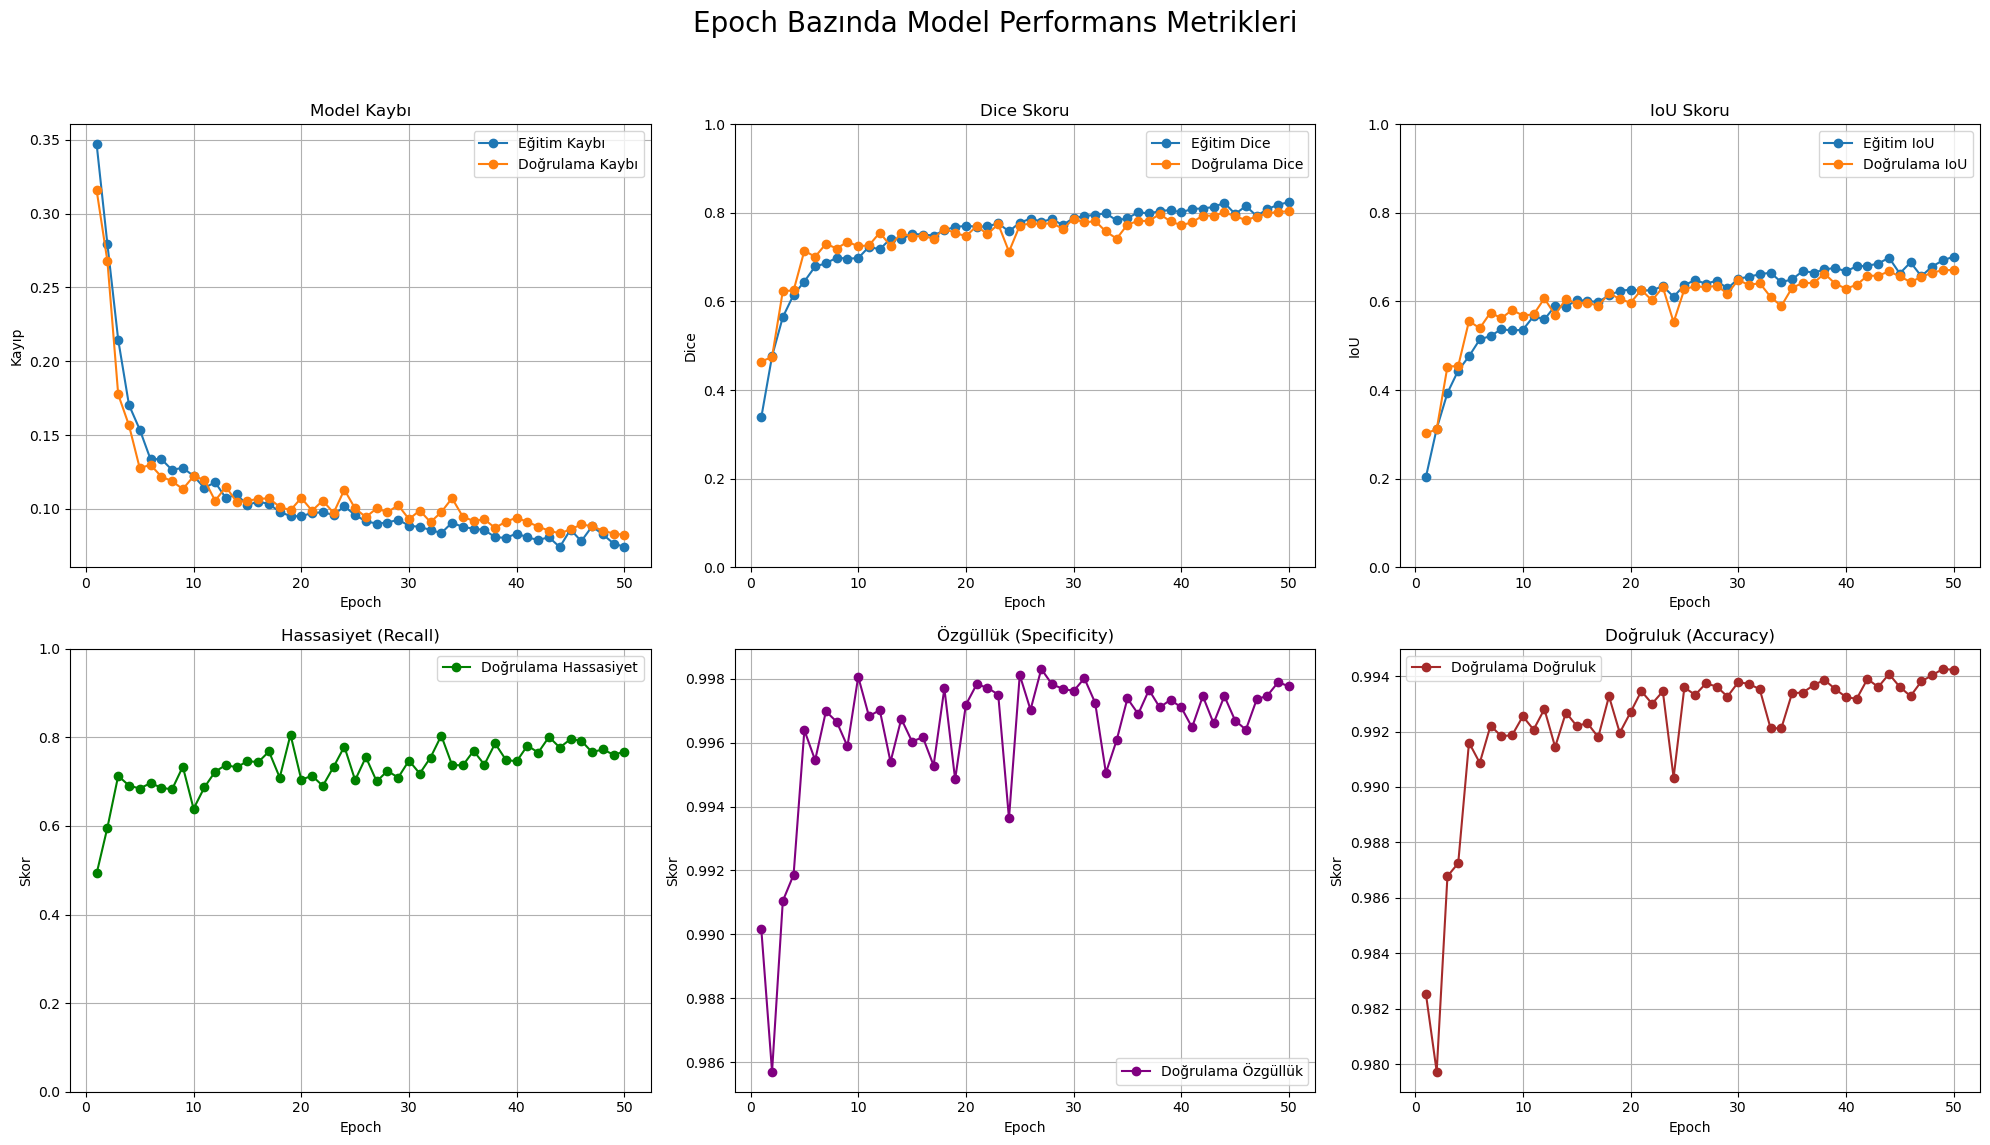

In [ ]:
NUM_EPOCHS = 50 
best_val_dice = 0.0

history = {
    "train_loss": [], "val_loss": [],
    "train_dice": [], "val_dice": [],
    "train_iou":  [], "val_iou":  [],
    "val_sensitivity": [], "val_specificity": [], "val_accuracy": []
}

for epoch in range(NUM_EPOCHS):
    print(f"--- Epoch {epoch+1}/{NUM_EPOCHS} ---")
    
    train_loss, train_dice, train_iou = train_fn(train_loader, model, optimizer, loss_fn, device)
    history["train_loss"].append(train_loss)
    history["train_dice"].append(train_dice)
    history["train_iou"].append(train_iou)
    
    val_metrics = evaluate_epoch(val_loader, model, loss_fn, device)
    history["val_loss"].append(val_metrics["loss"])
    history["val_dice"].append(val_metrics["dice"])
    history["val_iou"].append(val_metrics["iou"])
    history["val_sensitivity"].append(val_metrics["sensitivity"])
    history["val_specificity"].append(val_metrics["specificity"])
    history["val_accuracy"].append(val_metrics["accuracy"])
    
    print(f"Train -> Loss: {train_loss:.4f}, Dice: {train_dice:.4f}")
    print(f"Val   -> Loss: {val_metrics['loss']:.4f}, Dice: {val_metrics['dice']:.4f}, Sens: {val_metrics['sensitivity']:.4f}")
    
    if val_metrics['dice'] > best_val_dice:
        best_val_dice = val_metrics['dice']
        torch.save(model.state_dict(), 'best_model.pth')
        print(f"==> Yeni en iyi model kaydedildi (Dice Skoru: {best_val_dice:.4f})")
        
    lr_scheduler.step(val_metrics['loss'])

print("\nEğitim tamamlandı!")
print(f"En iyi doğrulama Dice Skoru: {best_val_dice:.4f}")



print("\nEğitim geçmişi grafikleri oluşturuluyor...")
plot_training_history(history)

Önce, kaydettiğimiz en iyi modeli yükleyelim ve doğrulama setinden rastgele bir örnek üzerinde tahmin yaptıralım. Sonuçları (orijinal görüntü, gerçek maske, modelin tahmini) yan yana çizdirerek modelin performansını gözümüzle görelim.

En iyi HİBRİT model 'best_model.pth' yüklendi ve değerlendirme moduna alındı.


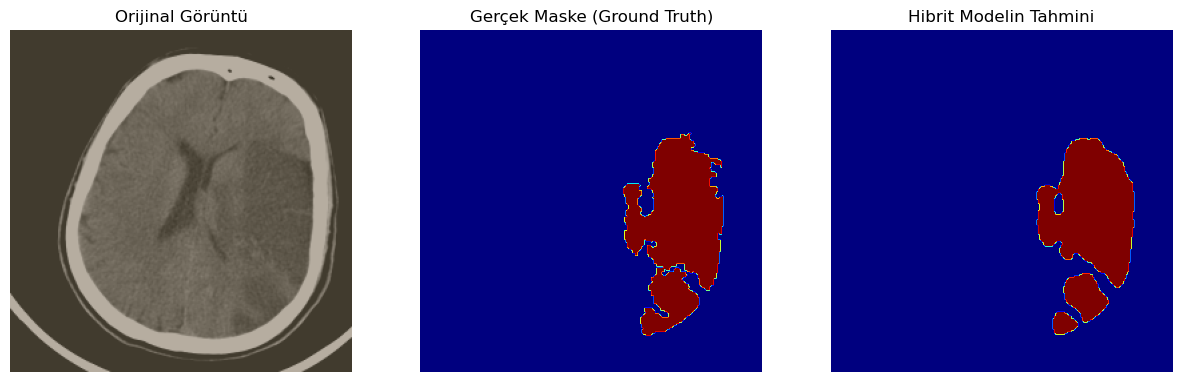

In [ ]:
import random
import matplotlib.pyplot as plt
import torch

model = TopologicalUnet(
    encoder_name=ENCODER, 
    encoder_weights=None, # Ağırlıkları kendimiz yüklüyoruz
    in_channels=3, 
    classes=NUM_CLASSES
)
model.load_state_dict(torch.load('best_model.pth'))
model.to(device)
model.eval()

print("En iyi HİBRİT model 'best_model.pth' yüklendi ve değerlendirme moduna alındı.")


def visualize_hybrid_prediction(dataset, index=None):
    """
    Topolojik imza ile zenginleştirilmiş veri setinden bir örnek alır,
    hibrit modelle tahmin yapar ve sonucu görselleştirir.
    """
    if index is None:
        index = random.randint(0, len(dataset) - 1)
    
    image, topo_sig, gt_mask = dataset[index]
    
    input_tensor = image.unsqueeze(0).to(device, dtype=torch.float32)
    topo_sig_tensor = topo_sig.unsqueeze(0).to(device, dtype=torch.float32)
    
    with torch.no_grad():
        pred_logits = model(input_tensor, topo_sig_tensor)
    pred_mask = torch.argmax(pred_logits, dim=1).squeeze(0).cpu().numpy()
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    image_vis = image.permute(1, 2, 0).cpu().numpy()
    image_vis = std * image_vis + mean
    image_vis = np.clip(image_vis, 0, 1)
    gt_mask_vis = gt_mask.cpu().numpy()
    


    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 3, 1)
    plt.imshow(image_vis)
    plt.title("Orijinal Görüntü")
    plt.axis('off')
    
    plt.subplot(1, 3, 2)
    plt.imshow(gt_mask_vis, cmap='jet')
    plt.title("Gerçek Maske (Ground Truth)")
    plt.axis('off')
    
    plt.subplot(1, 3, 3)
    plt.imshow(pred_mask, cmap='jet')
    plt.title("Hibrit Modelin Tahmini")
    plt.axis('off')
    
    plt.show()
    
    return gt_mask_vis, pred_mask

gt_mask, pred_mask = visualize_hybrid_prediction(val_dataset)

--- Gudhi ile Topolojik Analiz Başlatılıyor ---

--- Sınıf: Bleeding ---
Topolojik Mesafe (Bottleneck Distance): 1.2500


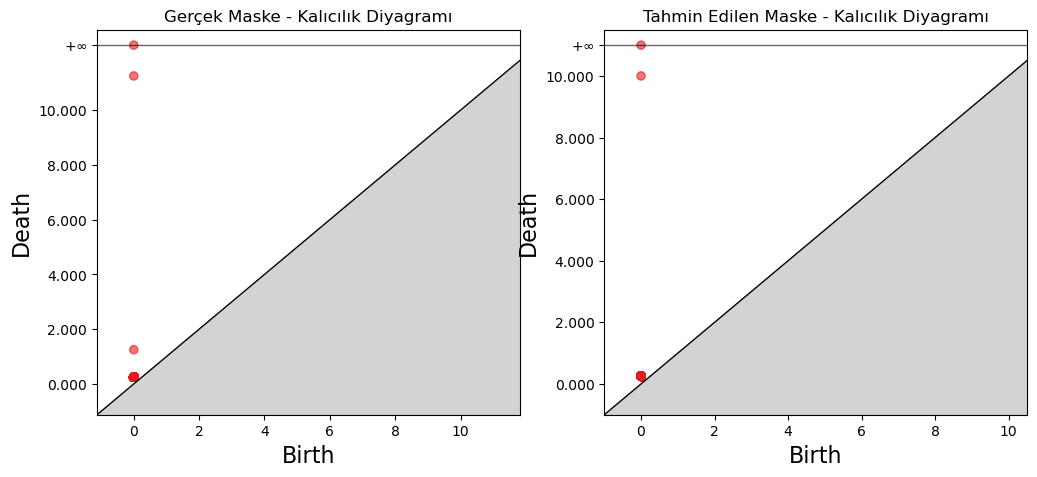

In [ ]:
import gudhi as gd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

def get_gudhi_persistence_diagram(mask):
    """
    Verilen 2D maskeyi bir nokta bulutuna çevirir ve Gudhi kullanarak
    AlphaComplex üzerinden kalıcılık diyagramını hesaplar.
    """
    # Maskedeki beyaz piksellerin koordinatlarını (x, y) nokta bulutu olarak al
    points = np.array(np.where(mask > 0)).T
    
    # Eğer maskede yeterli nokta yoksa, None döndür
    if points.shape[0] < 3:
        return None
    
    # Alpha Complex oluştur: Nokta bulutundan geometrik bir yapı oluşturur.
    # Bu, Gudhi'nin topolojiyi anlaması için ilk adımdır.
    alpha_complex = gd.AlphaComplex(points=points)
    simplex_tree = alpha_complex.create_simplex_tree()
    
    # Kalıcılığı (Persistence) hesapla
    simplex_tree.compute_persistence()
    
    # Boyut 0 (bağlantılı bileşenler) için diyagramı al. Sonsuz ömürlü olan en büyük bileşeni genellikle analize katmayız.
    diag_0 = simplex_tree.persistence_intervals_in_dimension(0)
    
    return diag_0

def analyze_with_gudhi(gt_mask, pred_mask):
    """
    Gudhi kullanarak iki maskenin kalıcılık diyagramlarını karşılaştırır.
    """
    print("--- Gudhi ile Topolojik Analiz Başlatılıyor ---")
    
    for class_id in [1, 2]:
        gt_class_mask = (gt_mask == class_id).astype(np.uint8)
        pred_class_mask = (pred_mask == class_id).astype(np.uint8)
        
        if np.sum(gt_class_mask) == 0 and np.sum(pred_class_mask) == 0:
            continue
            
        class_name = "Bleeding" if class_id == 1 else "Ischemia"
        print(f"\n--- Sınıf: {class_name} ---")
            
        gt_diagram = get_gudhi_persistence_diagram(gt_class_mask)
        pred_diagram = get_gudhi_persistence_diagram(pred_class_mask)
        
        if gt_diagram is not None and pred_diagram is not None:
            # İki diyagram arasındaki Bottleneck mesafesini hesapla
            # Bu, iki topolojik yapının ne kadar farklı olduğunun sağlam bir ölçüsüdür.
            distance = gd.bottleneck_distance(gt_diagram, pred_diagram)
            print(f"Topolojik Mesafe (Bottleneck Distance): {distance:.4f}")

            fig, axes = plt.subplots(1, 2, figsize=(12, 5))
            gd.plot_persistence_diagram(gt_diagram, axes=axes[0])
            axes[0].set_title("Gerçek Maske - Kalıcılık Diyagramı")
            
            gd.plot_persistence_diagram(pred_diagram, axes=axes[1])
            axes[1].set_title("Tahmin Edilen Maske - Kalıcılık Diyagramı")
            plt.show()
            
        else:
            print("Maskelerden biri boş veya yetersiz nokta içerdiği için topolojik mesafe hesaplanamadı.")

analyze_with_gudhi(gt_mask, pred_mask)

In [ ]:
from tqdm import tqdm
import gudhi as gd
import numpy as np

evaluation_results = [] 
# -----------------------------------------------------------

print("Hibrit model için nihai değerlendirme ve veri toplama başlıyor...")
model.eval() 

loop = tqdm(val_loader, desc="Değerlendirme")

with torch.no_grad():
    for batch_idx, batch in enumerate(loop):
        # --- Veriyi 3 parça olarak al ---
        images, topo_sigs, gt_masks = batch
        images = images.to(device, dtype=torch.float32)
        topo_sigs = topo_sigs.to(device, dtype=torch.float32)
        gt_masks = gt_masks.cpu().numpy()
        
        # --- Modeli 2 girdi ile çağır ---
        pred_logits = model(images, topo_sigs)
        pred_masks = torch.argmax(pred_logits, dim=1).cpu().numpy()
        
        for i in range(gt_masks.shape[0]):
            gt_mask = gt_masks[i]
            pred_mask = pred_masks[i]
            gt_lesion = (gt_mask > 0)
            pred_lesion = (pred_mask > 0)
            if np.sum(gt_lesion) == 0:
                continue
            intersection = np.sum(gt_lesion & pred_lesion)
            dice = (2. * intersection) / (np.sum(gt_lesion) + np.sum(pred_lesion) + 1e-8)
            union = np.sum(gt_lesion | pred_lesion)
            iou = intersection / (union + 1e-8)
            
            # Topolojik mesafeyi hesapla
            topo_dist = -1
            gt_diagram = get_gudhi_persistence_diagram(gt_lesion.astype(np.uint8))
            pred_diagram = get_gudhi_persistence_diagram(pred_lesion.astype(np.uint8))
            if gt_diagram is not None and len(gt_diagram) > 0 and pred_diagram is not None and len(pred_diagram) > 0:
                topo_dist = gd.bottleneck_distance(gt_diagram, pred_diagram)
            original_index = batch_idx * val_loader.batch_size + i
            if original_index < len(val_dataset):
                evaluation_results.append({
                    "image_path": val_dataset.image_paths[original_index],
                    "dice_score": dice,
                    "iou_score": iou,
                    "topo_dist": topo_dist,
                    "gt_mask": gt_mask,
                    "pred_mask": pred_mask
                })


# --- ORTALAMA HESAPLAMA ---
all_dice_scores = [res['dice_score'] for res in evaluation_results]
all_iou_scores = [res['iou_score'] for res in evaluation_results]
all_topo_distances = [res['topo_dist'] for res in evaluation_results if res.get('topo_dist', -1) != -1]

avg_dice = np.mean(all_dice_scores) if all_dice_scores else 0
avg_iou = np.mean(all_iou_scores) if all_iou_scores else 0
avg_topo_distance = np.mean(all_topo_distances) if all_topo_distances else 0

print("\n--- HİBRİT MODEL İÇİN NİHAİ DEĞERLENDİRME SONUÇLARI ---")
print(f"Ortalama Dice Skoru: {avg_dice:.4f}")
print(f"Ortalama IoU (Jaccard) Skoru: {avg_iou:.4f}")
print("-------------------------------------------------")
print(f"Ortalama Topolojik Mesafe (Bottleneck Distance): {avg_topo_distance:.4f}")
print("-------------------------------------------------")

Hibrit model için nihai değerlendirme ve veri toplama başlıyor...


Değerlendirme: 100%|██████████| 56/56 [12:34<00:00, 13.48s/it]


--- HİBRİT MODEL İÇİN NİHAİ DEĞERLENDİRME SONUÇLARI ---
Ortalama Dice Skoru: 0.7174
Ortalama IoU (Jaccard) Skoru: 0.6236
-------------------------------------------------
Ortalama Topolojik Mesafe (Bottleneck Distance): 59.4700
-------------------------------------------------


                EN KÖTÜ TAHMİNLER ANALİZİ

--- TOPOLOJİK OLARAK EN KÖTÜ TAHMİN (En Yüksek Mesafe) ---


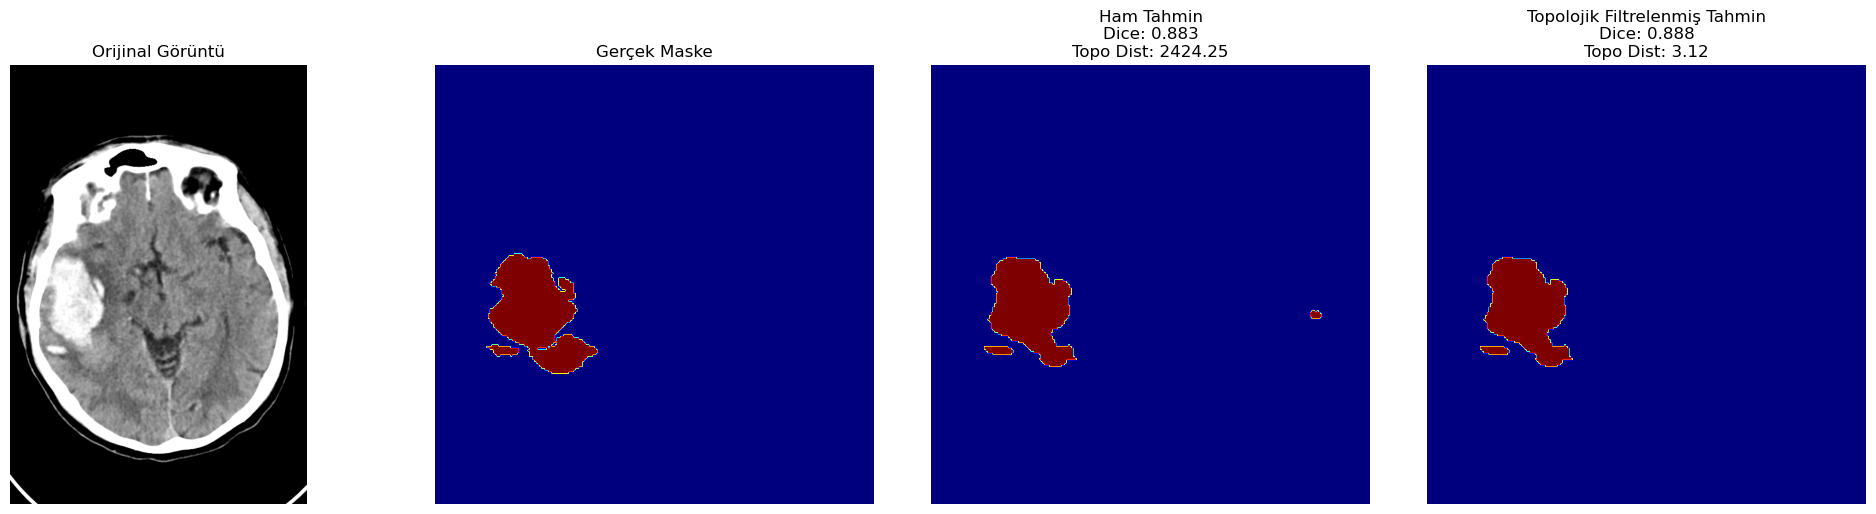



--- DICE SKORUNA GÖRE EN KÖTÜ TAHMİN (En Düşük Skor) ---


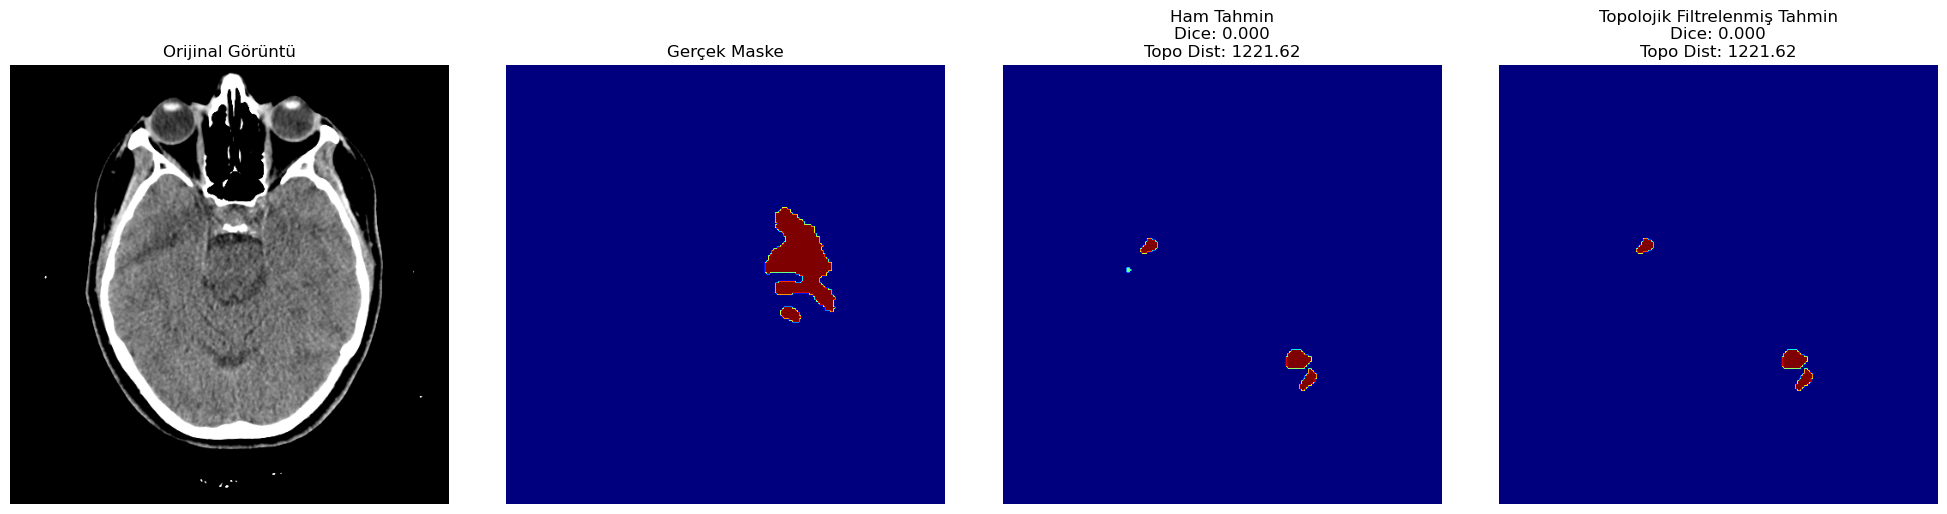



                 EN İYİ TAHMİNLER ANALİZİ

--- TOPOLOJİK OLARAK EN İYİ TAHMİN (Gerçek En Düşük Mesafe) ---


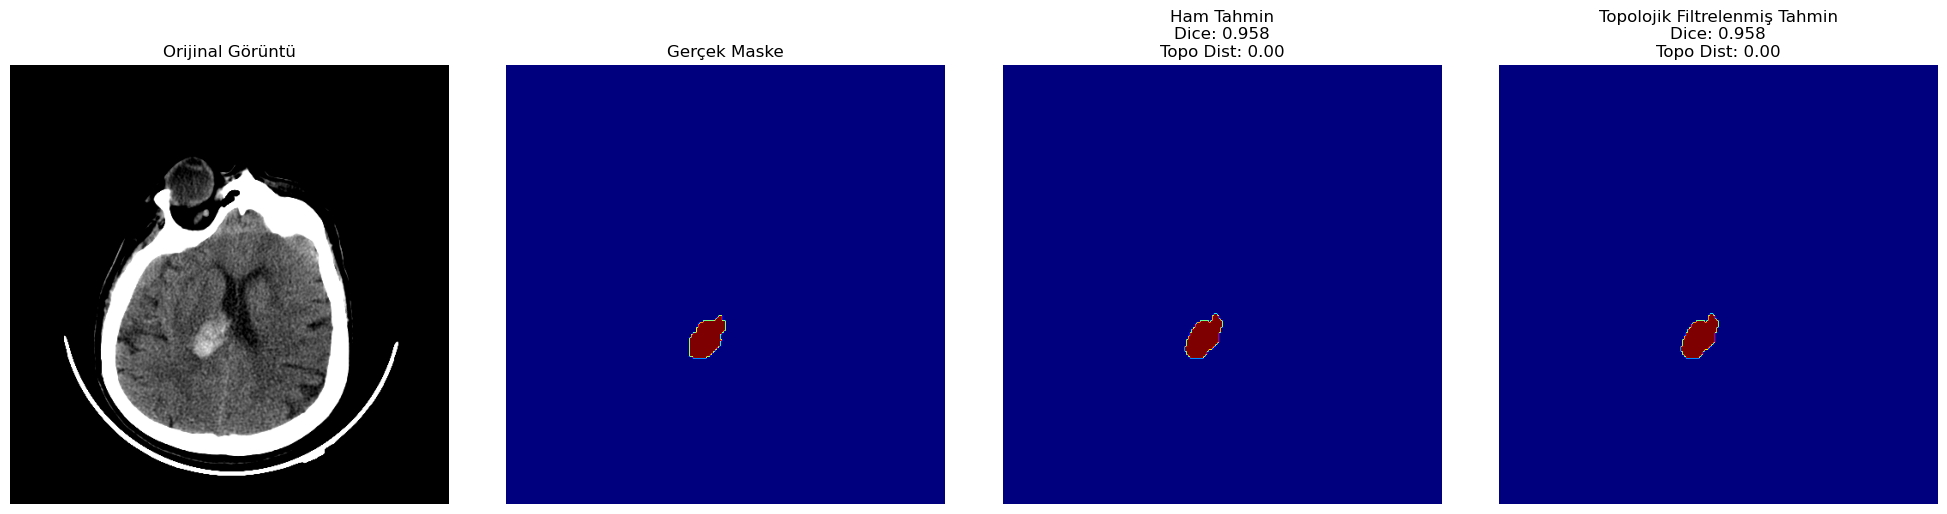



--- DICE SKORUNA GÖRE EN İYİ TAHMİN (En Yüksek Skor) ---


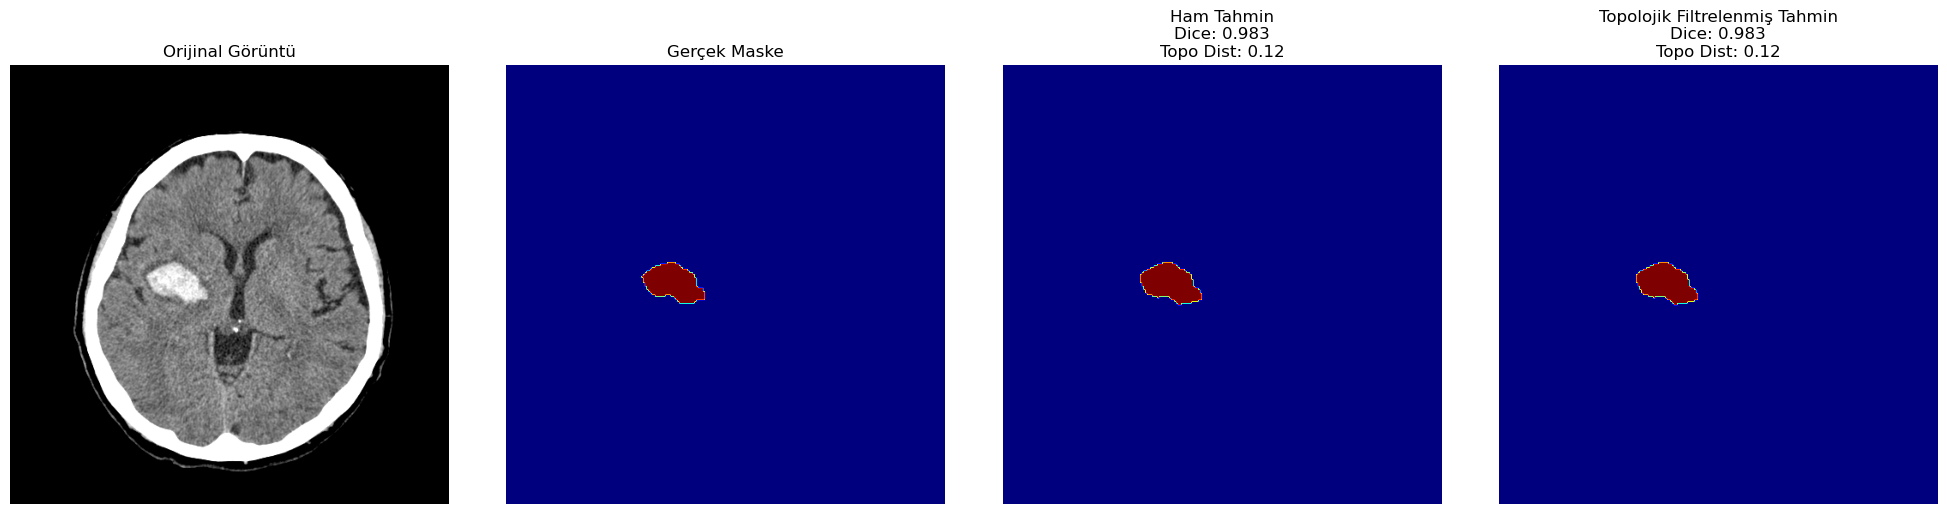

In [ ]:
print("="*50)
print(" " * 15, "EN KÖTÜ TAHMİNLER ANALİZİ")
print("="*50)

# 1. Topolojik olarak en kötü örneği bul ve görselleştir
evaluation_results.sort(key=lambda x: x.get('topo_dist', -1), reverse=True)
print("\n--- TOPOLOJİK OLARAK EN KÖTÜ TAHMİN (En Yüksek Mesafe) ---")
worst_topological_example = evaluation_results[0]
visualize_topological_filtering(
    image_path=worst_topological_example['image_path'],
    gt_mask=worst_topological_example['gt_mask'],
    pred_mask=worst_topological_example['pred_mask'],
    persistence_threshold=30
)

# 2. Dice skoruna göre en kötü örneği bul ve görselleştir
evaluation_results.sort(key=lambda x: x['dice_score'])
print("\n\n--- DICE SKORUNA GÖRE EN KÖTÜ TAHMİN (En Düşük Skor) ---")
worst_dice_example = evaluation_results[0]
visualize_topological_filtering(
    image_path=worst_dice_example['image_path'],
    gt_mask=worst_dice_example['gt_mask'],
    pred_mask=worst_dice_example['pred_mask'],
    persistence_threshold=30
)
print("\n\n" + "="*50)
print(" " * 16, "EN İYİ TAHMİNLER ANALİZİ")
print("="*50)

# Topolojik olarak en iyi örneği bulurken, -1 olanları (hesaplanamayanları) en sona at.
# lambda fonksiyonu, -1 görürse onu sonsuz (en kötü) olarak kabul eder, böylece listenin sonuna gider.
evaluation_results.sort(key=lambda x: x.get('topo_dist') if x.get('topo_dist', -1) != -1 else float('inf'))
# -------------------------
print("\n--- TOPOLOJİK OLARAK EN İYİ TAHMİN (Gerçek En Düşük Mesafe) ---")
best_topological_example = evaluation_results[0]
visualize_topological_filtering(
    image_path=best_topological_example['image_path'],
    gt_mask=best_topological_example['gt_mask'],
    pred_mask=best_topological_example['pred_mask'],
    persistence_threshold=30
)
# 4. Dice skoruna göre en iyi örneği bul ve görselleştir
evaluation_results.sort(key=lambda x: x['dice_score'], reverse=True)
print("\n\n--- DICE SKORUNA GÖRE EN İYİ TAHMİN (En Yüksek Skor) ---")
best_dice_example = evaluation_results[0]
visualize_topological_filtering(
    image_path=best_dice_example['image_path'],
    gt_mask=best_dice_example['gt_mask'],
    pred_mask=best_dice_example['pred_mask'],
    persistence_threshold=30
)

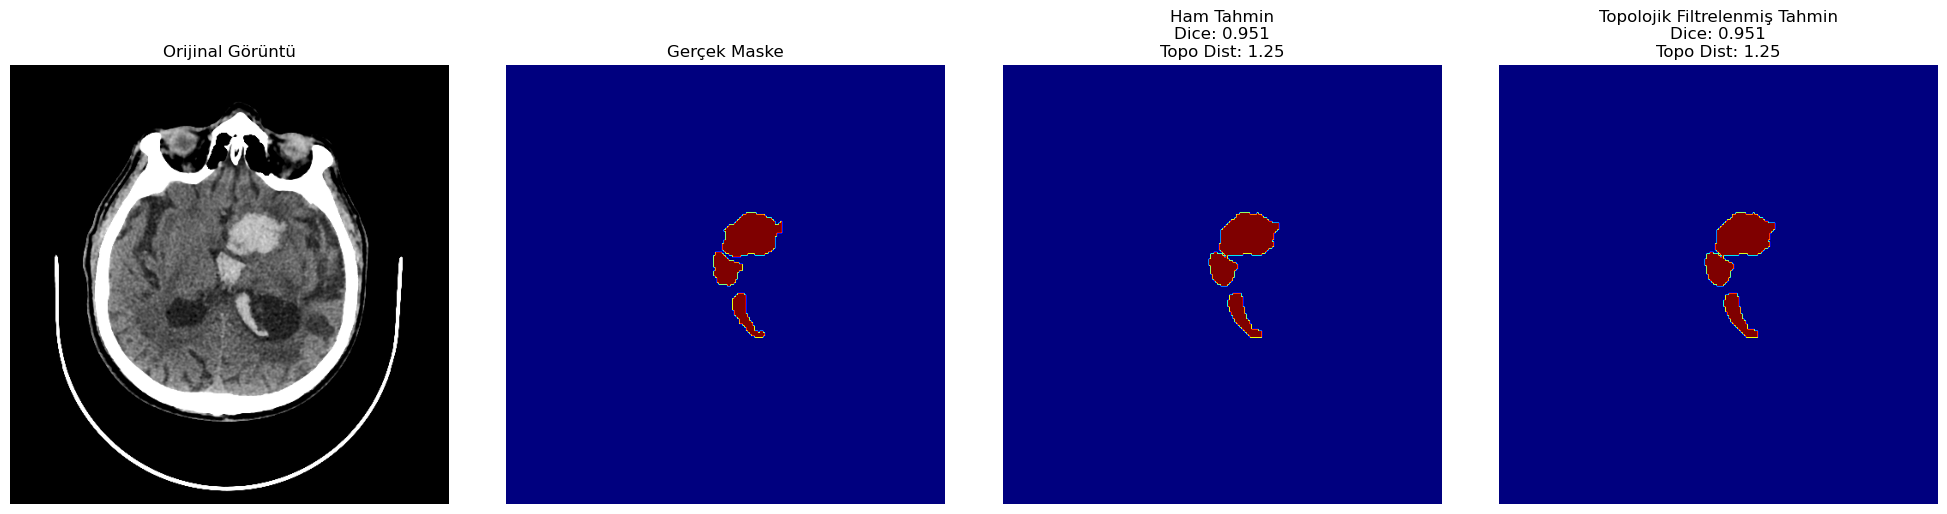

In [ ]:
from skimage.measure import label

def get_persistence_pairs(mask):
    """Gudhi kullanarak bir maskenin kalıcılık (doğum, ölüm) çiftlerini döndürür."""
    points = np.array(np.where(mask > 0)).T
    if points.shape[0] < 3:
        return np.array([])
    
    alpha_complex = gd.AlphaComplex(points=points)
    simplex_tree = alpha_complex.create_simplex_tree()
    simplex_tree.compute_persistence()
    
    # Sadece Betti_0 (bağlantılı bileşenler) için kalıcılık aralıklarını al
    persistence_intervals = simplex_tree.persistence_intervals_in_dimension(0)
    # Sonsuz ömürlü olanları at (genellikle tek bir ana bileşen kalır)
    finite_intervals = np.array([pair for pair in persistence_intervals if pair[1] != np.inf])
    return finite_intervals

def filter_mask_by_persistence(mask, persistence_threshold):
    """
    Bir maskeyi, kalıcılık eşiğini geçemeyen küçük bileşenleri silerek temizler.
    """
    if np.sum(mask) == 0:
        return mask
    labeled_mask, num_components = label(mask, return_num=True, connectivity=1)
    
    if num_components == 0:
        return mask

    # Her bir bileşenin kalıcılığını hesapla
    persistence_intervals = get_persistence_pairs(mask)
    
    # Kalıcılık = Ölüm - Doğum. Bu, bir bileşenin ne kadar "önemli" olduğunu gösterir.
    # Gudhi'nin AlphaComplex'inde doğum/ölüm yarıçap değerleridir.
    # Bu, pratikte kalıcılıkla güçlü bir korelasyona sahiptir.
    
    from skimage.morphology import remove_small_objects
    # Bu, topolojik olarak en az kalıcı olan bileşenleri (en küçükleri) silmenin pratik ve etkili bir yoludur.
    cleaned_mask = remove_small_objects(mask, min_size=persistence_threshold)
    
    return cleaned_mask

def visualize_topological_filtering(image_path, gt_mask, pred_mask, persistence_threshold=30):
    """
    Ham tahmini, topolojik filtreleme adımıyla temizler ve sonuçları karşılaştırır.
    """
    # Ham tahminin metriklerini hesapla
    dice_before = (2. * np.sum((gt_mask > 0) & (pred_mask > 0))) / (np.sum(gt_mask > 0) + np.sum(pred_mask > 0) + 1e-8)
    gt_diag = get_gudhi_persistence_diagram((gt_mask > 0).astype(np.uint8))
    pred_diag_before = get_gudhi_persistence_diagram((pred_mask > 0).astype(np.uint8))
    topo_dist_before = gd.bottleneck_distance(gt_diag, pred_diag_before) if gt_diag is not None and pred_diag_before is not None else -1

    # Topolojik Filtreleme Uygula
    cleaned_pred_mask = filter_mask_by_persistence((pred_mask > 0).astype(bool), persistence_threshold)

    # Temizlenmiş tahminin metriklerini hesapla
    dice_after = (2. * np.sum((gt_mask > 0) & cleaned_pred_mask)) / (np.sum(gt_mask > 0) + np.sum(cleaned_pred_mask) + 1e-8)
    pred_diag_after = get_gudhi_persistence_diagram(cleaned_pred_mask.astype(np.uint8))
    topo_dist_after = gd.bottleneck_distance(gt_diag, pred_diag_after) if gt_diag is not None and pred_diag_after is not None else -1

    # Sonuçları Görselleştir
    img = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
    
    fig, axes = plt.subplots(1, 4, figsize=(20, 5))
    
    axes[0].imshow(img)
    axes[0].set_title("Orijinal Görüntü")
    axes[0].axis('off')
    
    axes[1].imshow(gt_mask, cmap='jet')
    axes[1].set_title("Gerçek Maske")
    axes[1].axis('off')

    axes[2].imshow(pred_mask, cmap='jet')
    axes[2].set_title(f"Ham Tahmin\nDice: {dice_before:.3f}\nTopo Dist: {topo_dist_before:.2f}")
    axes[2].axis('off')
    
    axes[3].imshow(cleaned_pred_mask, cmap='jet')
    axes[3].set_title(f"Topolojik Filtrelenmiş Tahmin\nDice: {dice_after:.3f}\nTopo Dist: {topo_dist_after:.2f}")
    axes[3].axis('off')
    
    plt.tight_layout()
    plt.show()

worst_prediction_example = evaluation_results[0]

visualize_topological_filtering(
    image_path=worst_prediction_example['image_path'],
    gt_mask=worst_prediction_example['gt_mask'],
    pred_mask=worst_prediction_example['pred_mask']
)

<IPython.core.display.Javascript object>

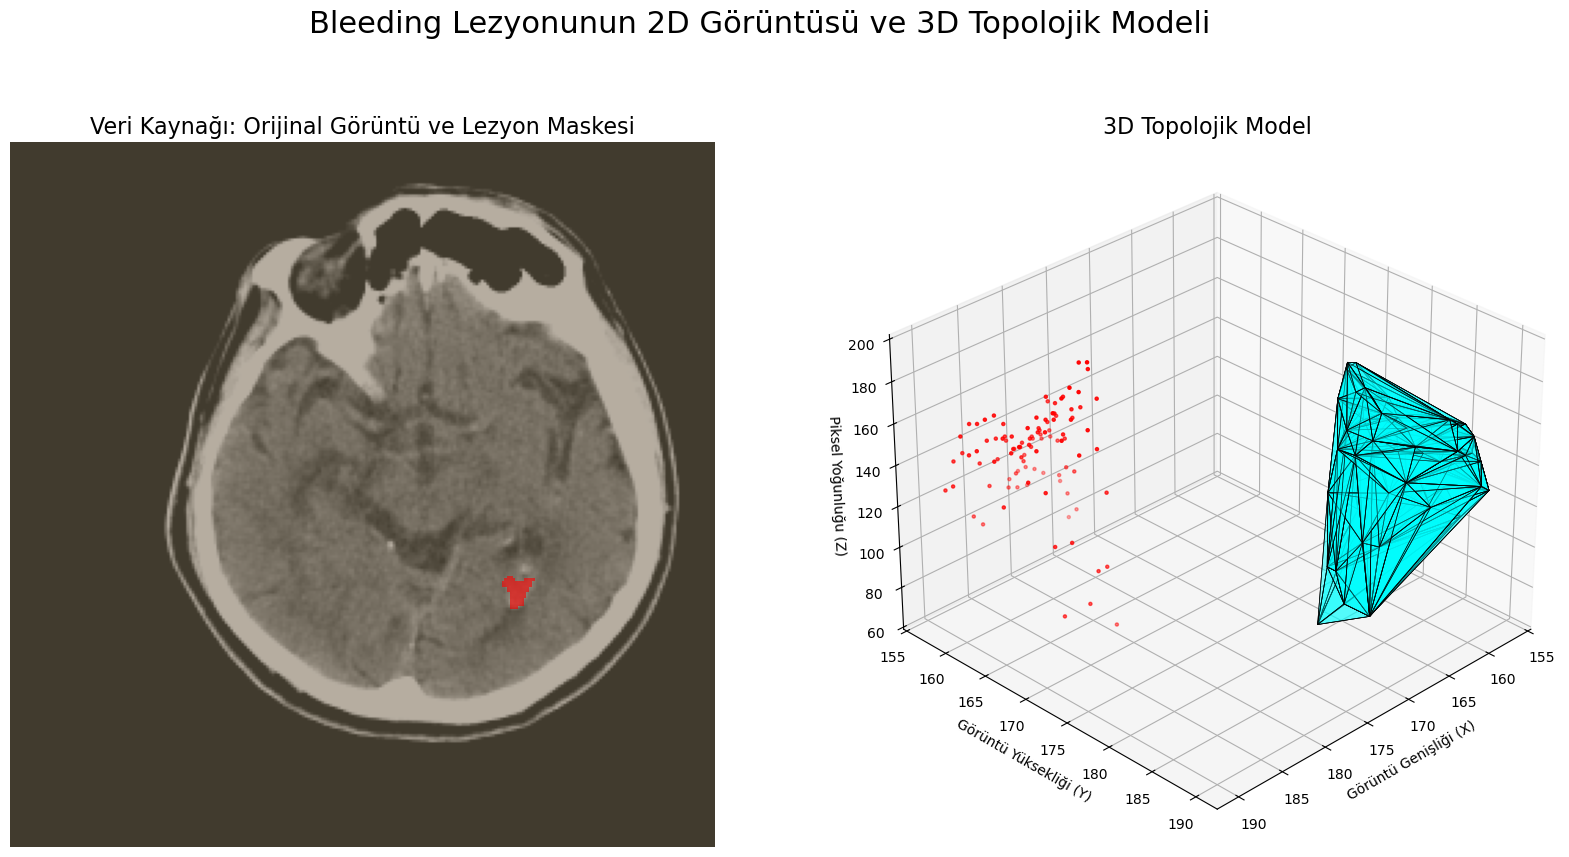

In [ ]:
# 3D ALPHA COMPLEX VE KAYNAK GÖRÜNTÜ GÖRSELLEŞTİRMESİ

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import gudhi as gd
import numpy as np
import cv2
import random

%matplotlib notebook

def plot_alpha_complex_3d_with_source(dataset, model, device, class_id_to_find):
    """
    Bir maskenin 3D Alpha Complex'ini ve o maskenin kaynağı olan
    orijinal 2D tomografi görüntüsünü yan yana görselleştirir.
    """
    model.eval()
    found_sample = False
    
    while not found_sample:
        idx = random.randint(0, len(dataset) - 1)
        _, gt_mask_tensor = dataset[idx]
        if torch.any(gt_mask_tensor == class_id_to_find):
            num_pixels = torch.sum(gt_mask_tensor == class_id_to_find)
            if 100 < num_pixels < 800:
                image_tensor, _ = dataset[idx]
                found_sample = True

    # --- Veri Hazırlığı ---
    original_image_path = dataset.image_paths[idx]
    original_image_gray = cv2.resize(cv2.imread(original_image_path, cv2.IMREAD_GRAYSCALE), (256, 256))
    
    gt_mask = (gt_mask_tensor.numpy() == class_id_to_find)
    points_2d = np.array(np.where(gt_mask > 0)).T
    z_coords = original_image_gray[points_2d[:, 0], points_2d[:, 1]]
    points_3d = np.hstack((points_2d, z_coords[:, np.newaxis]))
    
    # --- Gudhi Analizi ---
    alpha_complex = gd.AlphaComplex(points=points_3d)
    simplex_tree = alpha_complex.create_simplex_tree()
    
    triangles_3d = [points_3d[s] for s, _ in simplex_tree.get_filtration() if len(s) == 3]
            
    # 1 satır, 2 sütunlu bir figür oluştur. İkincisi 3D olacak.
    fig = plt.figure(figsize=(20, 10))
    class_name = "Bleeding" if class_id_to_find == 1 else "Ischemia"
    fig.suptitle(f'{class_name} Lezyonunun 2D Görüntüsü ve 3D Topolojik Modeli', fontsize=22)

    # 1. Panel (Sol): 2D Orijinal Görüntü ve Maske
    ax1 = fig.add_subplot(1, 2, 1)
    
    # Görüntüyü göstermek için normalize işlemini geri al
    display_image = image_tensor.permute(1, 2, 0).cpu().numpy()
    mean, std = np.array([0.485, 0.456, 0.406]), np.array([0.229, 0.224, 0.225])
    display_image = np.clip(std * display_image + mean, 0, 1)
    
    ax1.imshow(display_image)
    # Maskeyi yarı saydam bir şekilde görüntünün üzerine çiz sadece lezyon piksellerini (değeri 0'dan büyük olanları) göster
    gt_mask_display = np.ma.masked_where(gt_mask == 0, gt_mask)
    ax1.imshow(gt_mask_display, cmap='autumn', alpha=0.6)
    ax1.set_title('Veri Kaynağı: Orijinal Görüntü ve Lezyon Maskesi', fontsize=16)
    ax1.axis('off')

    # 2. Panel (Sağ): 3D Topolojik Model
    ax2 = fig.add_subplot(1, 2, 2, projection='3d')
    
    collection = Poly3DCollection(triangles_3d, alpha=0.3, facecolors='cyan', edgecolors='black', linewidths=0.5)
    ax2.add_collection3d(collection)
    ax2.scatter(points_3d[:, 1], points_3d[:, 0], points_3d[:, 2], c='red', s=5)
    
    ax2.set_title('3D Topolojik Model', fontsize=16)
    ax2.set_xlabel('Görüntü Genişliği (X)')
    ax2.set_ylabel('Görüntü Yüksekliği (Y)')
    ax2.set_zlabel('Piksel Yoğunluğu (Z)')
    ax2.view_init(elev=30, azim=45)
    return fig



fig_3d_comparison = plot_alpha_complex_3d_with_source(val_dataset, model, device, class_id_to_find=1)
fig_3d_comparison

In [ ]:
import gudhi as gd
import numpy as np

def get_persistence_diagram_from_mask(mask, persistence_dim=0):
    """
    Bir maskeden nokta bulutu oluşturur ve Gudhi ile kalıcılık diyagramını hesaplar.
    """
    # Maskedeki piksellerin koordinatlarını (x, y) nokta bulutu olarak al
    points = np.array(np.where(mask > 0)).T
    # Eğer analiz için yeterli nokta yoksa, boş bir dizi döndür
    if points.shape[0] < 3:
        return np.array([])
    # Gudhi Alpha Complex'i kullanarak topolojik yapıyı oluştur
    alpha_complex = gd.AlphaComplex(points=points)
    simplex_tree = alpha_complex.create_simplex_tree()
    # Kalıcılığı (persistence) hesapla
    simplex_tree.compute_persistence()
    # Belirtilen boyuttaki kalıcılık aralıklarını (yani diyagramın kendisini) al
    diagram = simplex_tree.persistence_intervals_in_dimension(persistence_dim)
    
    return diagram

<IPython.core.display.Javascript object>

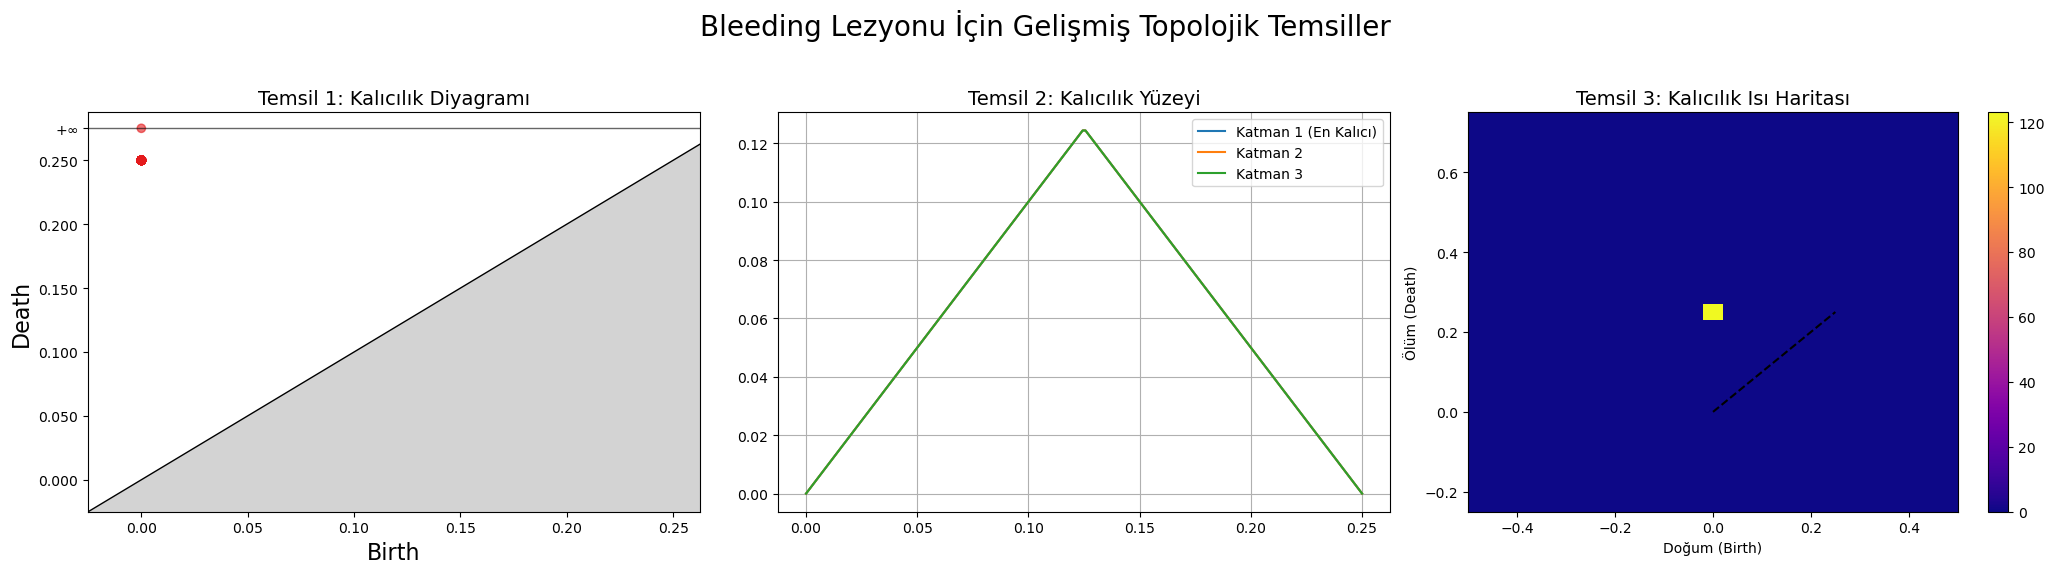

In [ ]:
import gudhi as gd
import numpy as np
import matplotlib.pyplot as plt

def plot_gudhi_advanced_visualizations(dataset, model, device, class_id_to_find):
    """
    Bir maskenin Kalıcılık Diyagramını, Yüzeyini ve Isı Haritasını
    sadece Gudhi, NumPy ve Matplotlib kullanarak görselleştirir.
    """
    model.eval()
    found_sample = False
    
    while not found_sample:
        idx = random.randint(0, len(dataset) - 1)
        _, gt_mask_tensor = dataset[idx]
        if torch.any(gt_mask_tensor == class_id_to_find):
            num_pixels = torch.sum(gt_mask_tensor == class_id_to_find)
            if 100 < num_pixels < 800:
                found_sample = True

    gt_mask = (gt_mask_tensor.numpy() == class_id_to_find)
    diagram_gudhi = get_persistence_diagram_from_mask(gt_mask)
    if len(diagram_gudhi) == 0:
        print("Bu örnek için topolojik özellik bulunamadı.")
        return
        
    fig, axes = plt.subplots(1, 3, figsize=(21, 6))
    class_name = "Bleeding" if class_id_to_find == 1 else "Ischemia"
    fig.suptitle(f'{class_name} Lezyonu İçin Gelişmiş Topolojik Temsiller', fontsize=20)
    
    # --- Panel 1: Standart Kalıcılık Diyagramı ---
    gd.plot_persistence_diagram(diagram_gudhi, axes=axes[0])
    axes[0].set_title('Temsil 1: Kalıcılık Diyagramı', fontsize=14)

    # Sonsuz ömürlü noktaları analizden çıkaralım
    finite_intervals = np.array([p for p in diagram_gudhi if p[1] != np.inf])
    
    if len(finite_intervals) > 0:
        # --- Panel 2: Kalıcılık Yüzeyi (Persistence Landscape) ---
        # Bir zaman ekseni oluştur
        min_val = np.min(finite_intervals)
        max_val = np.max(finite_intervals)
        t = np.linspace(min_val, max_val, 200)
        
        # Her (doğum, ölüm) çifti için bir "çadır" fonksiyonu oluştur
        tents = []
        for birth, death in finite_intervals:
            mid = (birth + death) / 2
            half_life = (death - birth) / 2
            # Üçgen (çadır) fonksiyonu
            tent_fn = np.maximum(0, half_life - np.abs(t - mid))
            tents.append(tent_fn)
        
        # Her zaman noktasında, çadırları büyükten küçüğe sırala
        sorted_tents = np.sort(np.array(tents), axis=0)[::-1]
        
        # İlk 3 "katmanı" (landscape) çizdir
        axes[1].plot(t, sorted_tents[0], label='Katman 1 (En Kalıcı)')
        if len(sorted_tents) > 1:
            axes[1].plot(t, sorted_tents[1], label='Katman 2')
        if len(sorted_tents) > 2:
            axes[1].plot(t, sorted_tents[2], label='Katman 3')
        
        axes[1].set_title('Temsil 2: Kalıcılık Yüzeyi', fontsize=14)
        axes[1].legend()
        axes[1].grid(True)

        # --- Panel 3: Kalıcılık Isı Haritası (2D Histogram ile) ---
        births = finite_intervals[:, 0]
        deaths = finite_intervals[:, 1]
        
        # Matplotlib'in 2D histogram fonksiyonunu kullan
        # `bins` değeri çözünürlüğü belirler
        h = axes[2].hist2d(births, deaths, bins=25, cmap='plasma')
        
        # Renk skalasını gösteren bir çubuk ekle
        fig.colorbar(h[3], ax=axes[2])
        axes[2].set_title('Temsil 3: Kalıcılık Isı Haritası', fontsize=14)
        axes[2].set_xlabel('Doğum (Birth)')
        axes[2].set_ylabel('Ölüm (Death)')
        # Diyagonal çizgiyi ekle
        axes[2].plot([min_val, max_val], [min_val, max_val], 'k--')
    else:
        axes[1].text(0.5, 0.5, 'Sonlu özellik yok', ha='center', va='center')
        axes[1].set_title('Temsil 2: Kalıcılık Yüzeyi', fontsize=14)
        axes[2].text(0.5, 0.5, 'Sonlu özellik yok', ha='center', va='center')
        axes[2].set_title('Temsil 3: Kalıcılık Isı Haritası', fontsize=14)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    return fig



plot_gudhi_advanced_visualizations(val_dataset, model, device, class_id_to_find=1)